# Project: Investigate a Dataset ([TMDb](https://www.kaggle.com/tmdb/tmdb-movie-metadata) movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>### **Overview**
>To complete my Data Analysis project I am using TMDb movies dataset. 

>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.   

>#### **Question that can analyised from this data set**
> 1. Which genres are most popular over decades?
> 2. which genres have the highest average revenue over decades?
> 3. Is there a strong correlation between budget and revenue?
> 4. which are varaibels that have strong correlation with popularity?
> 5. what the top ten  movies that have highest revenue?

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format='{:,.2f}'.format
from scipy import stats

<a id='wrangling'></a>
## Data Wrangling
<ul>
<li><a href="#genr">General Properties</a></li>
<li><a href="#Assess">Assessing</a></li>
<li><a href="#asess_notes">Asessing Notes</a></li>
<li><a href="#clean">Data Cleaning</a></li>
</ul>

<a id='genr'></a>
### General Properties

In [2]:
data=pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning...",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape wher...",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dystopic future,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from...",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


<a id='Assess'></a>
###  Assessing

In [3]:
data.sample(6)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7993,1621,tt0086465,1.12,40600000,90400000,Trading Places,Eddie Murphy|Dan Aykroyd|Jamie Lee Curtis|Denholm Elliott|Ralph Bellamy,NaN,John Landis,Some very funny business.,christmas tree|from rags to riches|broker|beggar|dollar,A snobbish investor and a wily street con-artist find their positions reversed as part of a bet ...,116,Comedy|Drama,Paramount Pictures|Cinema Group Ventures,6/7/83,353,6.90,1983,"88,886,067.11","197,913,804.60"
198,316322,tt4215332,0.71,0,0,Barbie in Princess Power,Britt Irvin|Michael Kopsa|Kelly Sheridan,NaN,Zeke Norton,Take flight with a new kind of princess!,barbie|princess|super powers,Barbie is Kara - a modern-day princess with a normal life. Kissed by a butterfly which gives her...,74,Family|Animation,Mattel Playground Productions,1/29/15,13,5.50,2015,0.00,0.00
2736,12138,tt0233142,0.47,62000000,18720175,3000 Miles to Graceland,Kurt Russell|Kevin Costner|Courteney Cox|Christian Slater|Kevin Pollak,NaN,Demian Lichtenstein,Crime Is King.,casino|submachine gun|hold-up robbery|elvis|reference to elvis presley,It was an ingenious enough plan: rob the Riviera Casino's count room during an Elvis impersonato...,125,Action|Adventure|Comedy|Thriller|Crime,Franchise Pictures|Warner Bros.|Morgan Creek Productions,2/23/01,85,5.40,2001,"76,352,263.24","23,053,673.05"
7594,14843,tt0829297,0.42,0,0,Ten Inch Hero,Elisabeth Harnois|Clea DuVall|Sean Patrick Flanery|Jensen Ackles|Danneel Ackles,http://www.teninchhero.com,David McKay,"Stop by, grab a sandwich, fall in love.",NaN,Four friends search for love and happiness while working at a California sandwich shop.,97,Comedy|Drama|Romance,NaN,4/25/07,21,6.90,2007,0.00,0.00
6498,2151,tt0365478,0.15,0,0,Man with the Screaming Brain,Bruce Campbell|Tamara Gorski|Ted Raimi|Antoinette Byron|Stacy Keach,NaN,Bruce Campbell,He's losing their minds,operation|taxi driver|face operation|comic book|bulgaria,In 2005 Bruce Campbell directed his first ever feature film. The film stars Bruce Campbell as a ...,90,Comedy|Horror|Science Fiction,ApolloProScreen,4/3/05,13,4.90,2005,0.00,0.00
4614,79694,tt1433822,0.40,17000000,9627492,The Apparition,Ashley Greene|Sebastian Stan|Tom Felton|Julianna Guill|Luke Pasqualino,http://theapparition.warnerbros.com,Todd Lincoln,Once You Believe You Die,experiment|supernatural|paranormal|haunting|disappearance,"Plagued by frightening occurrences in their home, Kelly and Ben learn that a university's paraps...",82,Horror|Thriller,StudioCanal|Dark Castle Entertainment|Warner Bros.|Studio Babelsberg Motion Pictures,8/23/12,76,4.40,2012,"16,145,652.78","9,143,655.47"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data[data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian Anthony Dale|Luke Goss,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|martial arts tournament,"In the year of 2039, after World Wars destroy much of the civilization as we know it, territorie...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [8]:
# min value is a zero in [['budget','revenue','runtime','budget_adj',revenue_adj]]
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


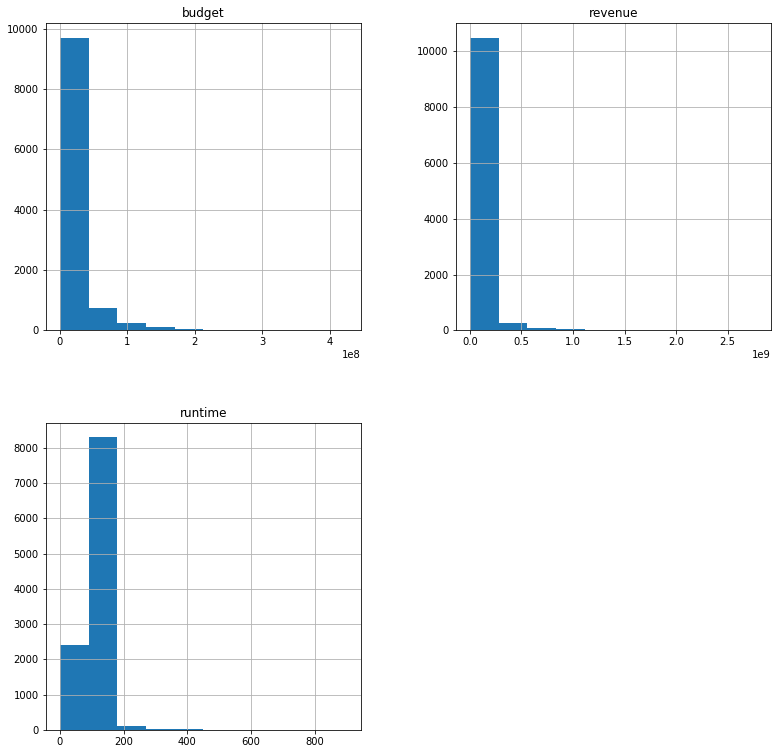

In [9]:
data[['revenue','budget','runtime']].hist(figsize=(13,13));

In [10]:
#The movie which has the highest runtime is a documentary movie. 
data[data.runtime == 900.00]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.01,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp|Agnes de Mille,http://www.channel4.com/programmes/the-story-of-film-an-odyssey,Mark Cousins,NaN,cinema|nouvelle vague|hindi cinema|cinema novo|russian cinema,"The Story of Film: An Odyssey, written and directed by award-winning film-maker Mark Cousins, is...",900,Documentary,NaN,9/3/11,14,9.20,2011,0.00,0.00


In [11]:
zero_data=data[(data.revenue ==0)|(data.budget==0)|(data.runtime==0)]
zero_data.shape

(7011, 21)

In [12]:
data[data.runtime==0].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
334,361931,tt5065822,0.36,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,"Filmed over 14 months with unprecedented access into the inner circle of the man and the sport, ...",0,Documentary,"On The Corner Films|We Came, We Saw, We Conquered Studios",11/9/15,80,6.50,2015,0.00,0.00
5920,248842,tt2364006,0.17,0,0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a MillÃ¡n|Simon Delaney|Bronagh Gallagher,NaN,Dominic Harari|Teresa Pelegri,NaN,woman director,A dysfunctional love story about an Irish food writer and a politically committed Spanish woman.,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox International Productions (FIP),12/18/13,12,5.60,2013,0.00,0.00
3794,58253,tt1588335,0.18,0,0,"Toi, moi, les autres",LeÃ¯la Bekhti|Benjamin Siksou|CÃ©cile Cassel|Chantal Lauby|Nicolas BrianÃ§on,"http://www.google.fr/m/url?ei=e3BxTcjeLMqB8wP6rPHyAw&gl=fr&q=http://fr.wikipedia.org/wiki/Moi,_t...",Audrey Estrougo,NaN,woman director,NaN,0,Music|Romance,NaN,2/22/11,17,5.20,2011,0.00,0.00


In [13]:
#revenue_adj and revenue_adj have the same rows length with runtime missing values.
data[(data.revenue_adj ==0)|(data.budget_adj==0)|(data.runtime==0)].shape

(7011, 21)

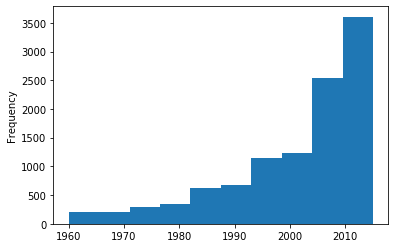

In [14]:
data.release_year.plot(kind='hist');

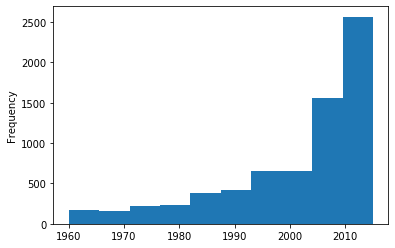

In [15]:
#missing values in [revenue,budget,runtime] associated more with early decades from the '60s to '80s 
zero_data.release_year.plot(kind='hist');

In [16]:
display(data.genres.value_counts())
print('-'*80)
display(data.cast.value_counts())

Comedy                                     712
Drama                                      712
Documentary                                312
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Mystery|Comedy|Crime                         1
Action|Adventure|Animation|Comedy|Drama      1
Drama|Mystery|Thriller|Crime|Romance         1
Fantasy|Adventure|Animation|Family           1
Drama|Action|Foreign                         1
Name: genres, Length: 2039, dtype: int64

--------------------------------------------------------------------------------


Louis C.K.                                                                      6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei         5
Bill Burr                                                                       4
Chris Wedge                                                                     3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu              3
                                                                               ..
Walter Matthau|George Burns|Richard Benjamin|Lee Meredith|Carol Arthur          1
Charlie Sheen|Kiefer Sutherland|Chris O'Donnell|Oliver Platt|Tim Curry          1
Jean-Claude Van Damme|Kiana Tom|Bill Goldberg|Michael Jai White|Heidi Schanz    1
Nicolas Cage|Sarah Wayne Callies|Veronica Ferres|Lyriq Bent|Lauren Beatty       1
Pierce Brosnan|Geoffrey Rush|Jamie Lee Curtis|Leonor Varela|Brendan Gleeson     1
Name: cast, Length: 10719, dtype: int64

<a id='asess_notes'></a>
# Assesing Notes:

### 1- Selecting between Columns budget,revenue and budget_adj,revenue_adj:

We have multiple columns specifying the same thing such as Columns named budget,revenue
and budget_adj,revenue_adj. We have assumed that the columns budget_adj & revenue_adj 
are adjusted according to the current market inflation and hence will provide a better
option to analyse revenue or budgets of movies which have released in different years.
This is purely our assumption the data set doesnot specify anything regarding this.
So in addition to point 1) we will remove the columns revenue and budget as well.

## 2-  zero's values, NaN and useless columns:
the describe() method and the histogramms, show that [budget_adj, revenue_adj and runtime], contain many "0" in their columns. And as they are an essinsial attributes we should drop the rows that contain zeros to provide more meaningful analysis. And the info() method shows that [[homepage,tagline,production_companies]] columns have many missing values and should be dropped. also [[keywords,overview,imbd_id,id,release_date]] seem not important for our analysis, those should be dropped too.
 
## 3- Tidiness issue:

In [genres, cast] coulmns there are many rows contain several values, which are seperated by an "|". so these columns need to be more tidy by seprating the values and consider the first value as the genre of the movie and the actor/ actress of the cast.

### 4- release_year:
We need to label release_year with pd.cut() method to convert years to decades for more proper analysis.


<a id='clean'></a>
### Data Cleaning 

1- drop [revenue, budget,homepage,tagline,production_companies,keywords,overview,imbd_id,id,release_date]

In [17]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [18]:
data.drop(
    ['revenue', 'budget','homepage','tagline','production_companies','keywords','overview'\
     ,'imdb_id','id','release_date'],inplace=True,axis=1)

In [19]:
data.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

2- drop rows that contain zeros values in [revenue_adj,budget_adj,runtime] and drop nan values in other columns. 

In [20]:
zeros_data=data[(data.revenue_adj ==0)|(data.budget_adj==0)|(data.runtime==0)]
data.drop(zeros_data.index,inplace=True)

In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 360.9+ KB


3- label release_year with pd.cut() method to convert years to decades.

In [23]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
data.release_year=pd.cut(data.release_year,bins_edges,labels=bins_names)

In [24]:
data.release_year.value_counts() #.nlargest(10)

2000s    1530
2010s     861
1990s     808
1980s     424
1970s     145
1960s      77
Name: release_year, dtype: int64

4- Tidiness issue:
seprate the values and consider the first value as the genre of the movie and the actor/ actress of the cast. [Source](https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python)

In [25]:
def seprate_values(col):
    new_cols=(data[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [26]:
# use the func with np.vectorize because it's faster than apply
import time 
t1=time.time()
vect_func=np.vectorize(seprate_values('cast'))
df_cast=vect_func.pyfunc
time.time() - t1

0.03601217269897461

In [27]:
df_gen=seprate_values('genres')

In [28]:
data['cast'],data['genres']=df_cast['cast_1'],df_gen['genres_1']

In [29]:
display(data['cast'].value_counts().nlargest(10))
print('-'*60)
display(data['genres'].value_counts().nlargest(10))

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Tom Hanks                28
Denzel Washington        28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

------------------------------------------------------------


Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: genres, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( Which genres are most popular over decades?)

In [79]:
data.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12.00,15.00,1.00,10.00,6.00,nan,18.00,1.00,nan,2.00,3.00,2.00,1.00,nan,1.00,nan,nan,1.00,4.00
1970s,28.00,15.00,2.00,18.00,12.00,nan,34.00,1.00,2.00,nan,18.00,2.00,2.00,1.00,7.00,nan,2.00,nan,1.00
1980s,73.00,51.00,5.00,83.00,17.00,2.00,71.00,4.00,21.00,nan,52.00,4.00,1.00,4.00,20.00,nan,13.00,3.00,nan
1990s,159.00,53.00,16.00,174.00,43.00,2.00,184.00,7.00,29.00,4.00,52.00,5.00,9.00,19.00,18.00,1.00,31.00,1.00,1.00
2000s,269.00,128.00,44.00,351.00,58.00,19.00,368.00,16.00,40.00,4.00,94.00,9.00,15.00,23.00,25.00,nan,53.00,7.00,7.00
2010s,146.00,52.00,35.00,149.00,36.00,5.00,213.00,11.00,18.00,7.00,56.00,7.00,8.00,19.00,27.00,nan,61.00,8.00,3.00


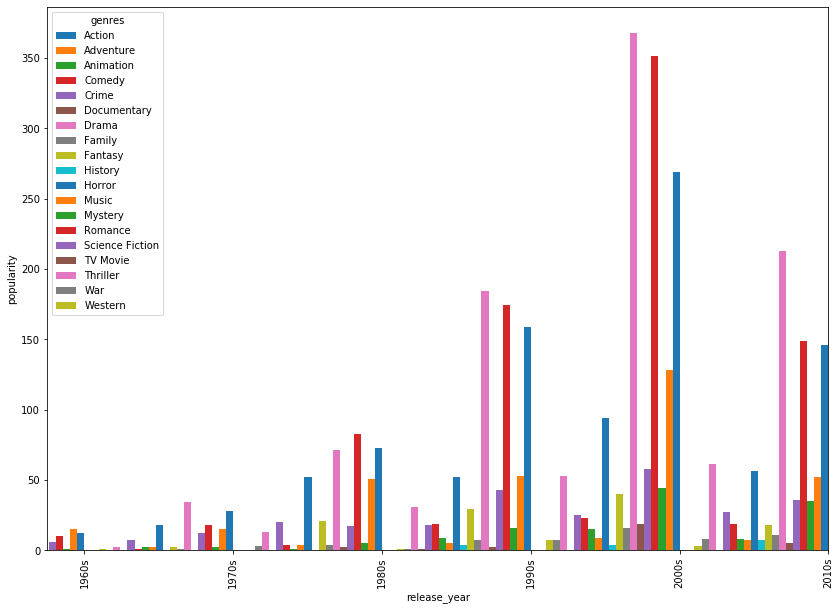

In [61]:
fig, ax = plt.subplots(figsize=(14,10))
data.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');

### Research Question 2  (which genres have the highest average revenue over decades?)

In [57]:
pd.pivot_table(data,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,"273,144,064.29","383,959,878.19","312,692,750.95","248,114,015.18","138,694,036.03",nan,"286,199,519.86","1,345,551,058.99",nan,"387,052,576.27","101,713,201.62","322,654,322.13","87,334,191.00",nan,"355,546,597.21",nan,nan,"68,958,599.76","123,021,722.69"
1970s,"172,102,738.97","568,111,455.31","94,907,227.13","246,708,691.32","133,560,592.92",nan,"279,143,709.23","21,540,779.66","157,839,884.49",nan,"255,578,853.01","456,325,769.65","50,602,065.41","155,727,481.50","267,128,337.77",nan,"71,681,503.22",nan,"41,794,650.61"
1980s,"114,050,372.79","227,810,277.23","147,256,903.98","111,769,165.50","56,203,884.65","8,379,384.44","126,479,214.71","122,318,639.12","214,372,142.33",nan,"63,635,488.17","35,499,370.96","18,475,642.09","217,047,572.00","190,528,801.36",nan,"74,406,461.17","47,751,321.15",nan
1990s,"154,411,561.25","270,359,655.45","255,325,263.84","112,697,017.10","155,918,894.51","46,513,660.82","108,743,568.65","401,353,894.11","134,085,503.48","195,315,862.17","61,189,564.06","121,322,688.27","142,034,081.59","165,078,855.09","166,868,116.56","58,389,103.04","100,889,863.46","21,464,503.01","247,334,532.94"
2000s,"132,016,791.34","311,435,053.92","317,135,191.73","88,245,939.75","69,204,033.52","23,925,937.76","71,788,211.58","227,851,164.30","219,625,299.66","214,294,754.83","76,628,758.87","103,838,677.47","78,097,623.09","88,066,576.23","158,689,280.27",nan,"120,286,596.39","145,911,101.02","82,725,093.87"
2010s,"240,430,040.42","296,416,535.42","320,240,531.56","81,576,842.17","75,588,897.19","31,800,002.02","50,055,089.27","236,562,012.73","215,846,471.63","63,511,845.92","54,686,184.51","69,637,681.31","61,606,224.36","106,166,490.66","306,512,456.68",nan,"64,935,111.10","194,561,571.79","164,186,080.65"


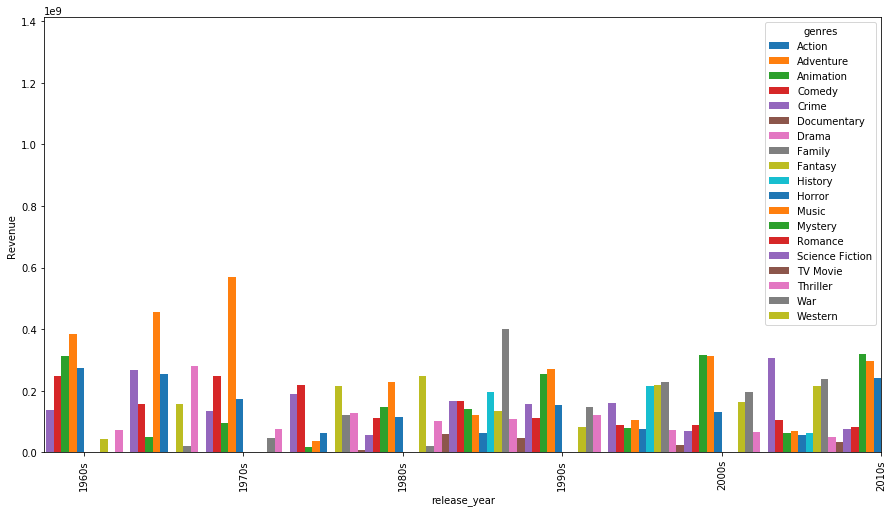

In [63]:
# It's better to plot the pivot_table for easier observation
fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(data,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Revenue');

### Research Question 3  (Is there a strong correlation between budget and revenue?)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


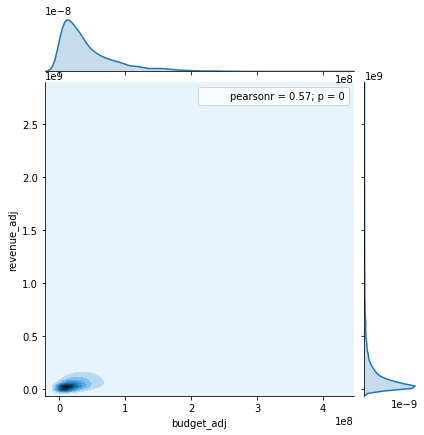

In [66]:
sns.jointplot(x='budget_adj',y='revenue_adj',data=data,kind='kde').annotate(stats.pearsonr);

### Research Question 4 (which are varaibels that have strong correlation with popularity?)

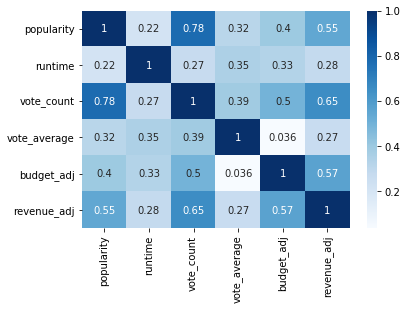

In [73]:
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True);

### Research Question 5 (what the top ten  movies that have highest revenue?)

In [78]:
data.nlargest(10, ['revenue_adj'])

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.43,Avatar,Sam Worthington,James Cameron,162,Action,8458,7.10,2000s,"240,886,902.89","2,827,123,750.41"
1329,12.04,Star Wars,Mark Hamill,George Lucas,121,Adventure,4428,7.90,1970s,"39,575,591.36","2,789,712,242.28"
5231,4.36,Titanic,Kate Winslet,James Cameron,194,Drama,4654,7.30,1990s,"271,692,064.21","2,506,405,735.42"
10594,2.01,The Exorcist,Linda Blair,William Friedkin,122,Drama,1113,7.20,1970s,"39,289,276.63","2,167,324,901.20"
9806,2.56,Jaws,Roy Scheider,Steven Spielberg,124,Horror,1415,7.30,1970s,"28,362,748.20","1,907,005,841.92"
3,11.17,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.50,2010s,"183,999,919.04","1,902,723,129.80"
8889,2.90,E.T. the Extra-Terrestrial,Henry Thomas,Steven Spielberg,115,Science Fiction,1830,7.20,1980s,"23,726,245.23","1,791,694,309.25"
8094,1.14,The Net,Sandra Bullock,Irwin Winkler,114,Crime,201,5.60,1990s,"31,481,271.08","1,583,049,536.35"
10110,2.63,One Hundred and One Dalmatians,Rod Taylor,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure,913,6.60,1960s,"29,179,444.83","1,574,814,739.70"
4361,7.64,The Avengers,Robert Downey Jr.,Joss Whedon,143,Science Fiction,8903,7.30,2010s,"208,943,741.90","1,443,191,435.21"


<a id='conclusions'></a>
## Conclusions

This was a joyful process, We came out with some interesting fidings about movies as following:

>#### **Which genres are most popular over decades?**

        This question has shown that the most popular genre differed a lot from early decades to late decades, and the top three genres for each decade are:

> . 1960s: Adventure, Action, Comdey. 

> . 1970s: Drama, Action, Horror, comdey.

> . 1980s: Comdey, Drama, Action.

> . 1990s: Drama, Comdey, Action.

> . 2000s:  Drama, Comdey, Action.

> . 2010s:  Drama, Comdey, Action.

>#### **Which genres have the highest average revenue over decades?
> . 1960s: Adventure, Animation, Action. 

> . 1970s: Adventure, Music, Drama.

> . 1980s: Adventure, Romance, Fantasy.

> . 1990s: Family, Adventure, Western, Animation.

> . 2000s: Animation, Adventure, Family.

> . 2010s: Animation, science fiction, Adventure.

>#### **Is there a strong correlation between budget and revenue?
there is a positive relation between them but not that much strength, however correlation does not mean causation.

>#### **Which are varaibels that have strong correlation with popularity?
vote_count has the strongest correlation with popularity.

>#### **what the top ten  movies that have highest revenue?

> Avater, Star Wars, Titanic, etc... have the highest revenue.
